# Notebook Setup

<div style="text-align: justify;">In this setup phase, essential modules and functions are imported to facilitate data preprocessing, feature engineering, hyperparameter tuning, model training, and evaluation processes. Additionally, common data manipulation and visualization libraries, such as Pandas, Matplotlib, and Seaborn, are included alongside scikit-learn's machine learning and preprocessing tools. This preparation step ensures that all necessary tools are readily available for conducting a comprehensive analysis and developing machine learning models to predict Titanic survival outcomes.</div>

In [1]:
# Import necessary modules from the package
from titanic_survival_package.data_preprocessing import load_dataset,demonstrate_preprocessing, fill_missing_values, preprocess_data
from titanic_survival_package.feature_engineering import create_family_size_feature, extract_and_process_titles, add_interaction_terms, drop_unnecessary_features
from titanic_survival_package.hyperparameter_tuning import tune_hyperparameters_grid, tune_hyperparameters_random
from titanic_survival_package.models import ModelTrainer, ModelEvaluator, train_stacking_model, generate_submission

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load and Preprocess the Data

<div style="text-align: justify;">
    During data loading and preprocessing, an initial analysis reveals insights into feature statistics, missing values, and data diversity. A correlation matrix further explores relationships, especially between numerical features and the 'Survived' target, guiding preprocessing and feature engineering to enhance model accuracy.
A positive correlation between 'Survived' and 'Sex' suggests females had a higher survival rate, while a negative correlation with 'Pclass' highlights lower survival rates among lower-class passengers. Engineered features such as 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', and 'Age_Pclass' are incorporated, reflecting detailed aspects of the dataset conducive to model refinement.
</div>

In [13]:
# General Analysis of the Training Data

# Basic statistical overview
train_description = train_df.describe(include='all')

# Checking for missing values in the training dataset
missing_values_train = train_df.isnull().sum()

# Checking for unique values in each column to understand the diversity of data
unique_values_train = train_df.nunique()

# Overview of correlation between features, especially with the target variable 'Survived'
correlation_matrix = train_df.corr(numeric_only=True)

train_description, missing_values_train, unique_values_train, correlation_matrix


(        PassengerId    Survived      Pclass         Sex         Age  \
 count    891.000000  891.000000  891.000000  891.000000  891.000000   
 unique          NaN         NaN         NaN         NaN         NaN   
 top             NaN         NaN         NaN         NaN         NaN   
 freq            NaN         NaN         NaN         NaN         NaN   
 mean     446.000000    0.383838    2.308642    0.352413   29.361582   
 std      257.353842    0.486592    0.836071    0.477990   13.019697   
 min        1.000000    0.000000    1.000000    0.000000    0.420000   
 25%      223.500000    0.000000    2.000000    0.000000   22.000000   
 50%      446.000000    0.000000    3.000000    0.000000   28.000000   
 75%      668.500000    1.000000    3.000000    1.000000   35.000000   
 max      891.000000    1.000000    3.000000    1.000000   80.000000   
 
              SibSp       Parch        Fare    Embarked  FamilySize  \
 count   891.000000  891.000000  891.000000  891.000000  891.00

<div style="text-align: justify;">In this part, datasets are loaded and preprocessed. Initial loading segregates training and test datasets. An analysis, focusing on 'Sex', 'Pclass', and 'Embarked' features, is conducted on the training data. Subsequently, missing values are addressed, and columns deemed unnecessary are omitted. Finally, preprocessing further engineers and encodes features within the training dataset, preparing it for subsequent analysis and modeling.</div>

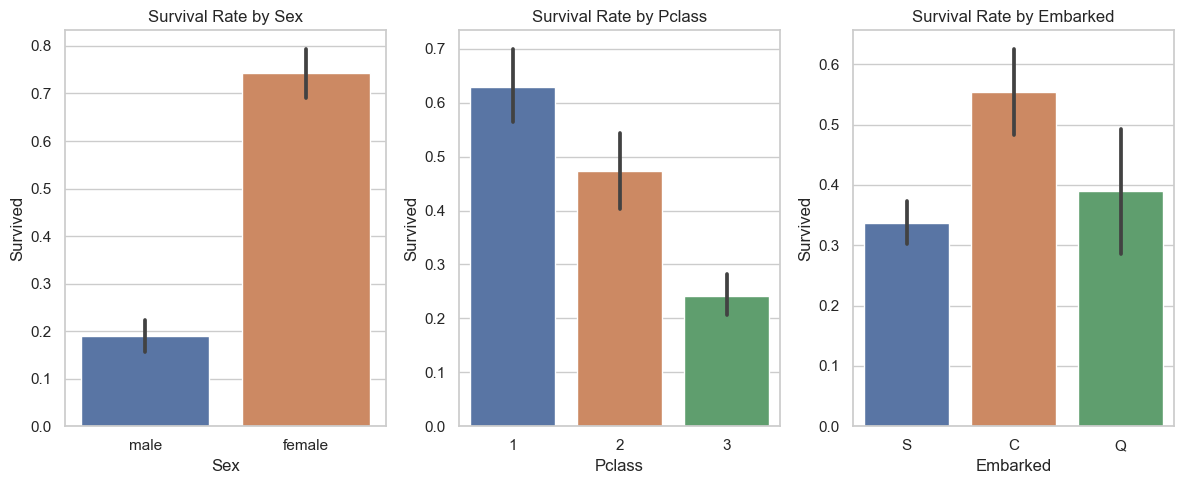

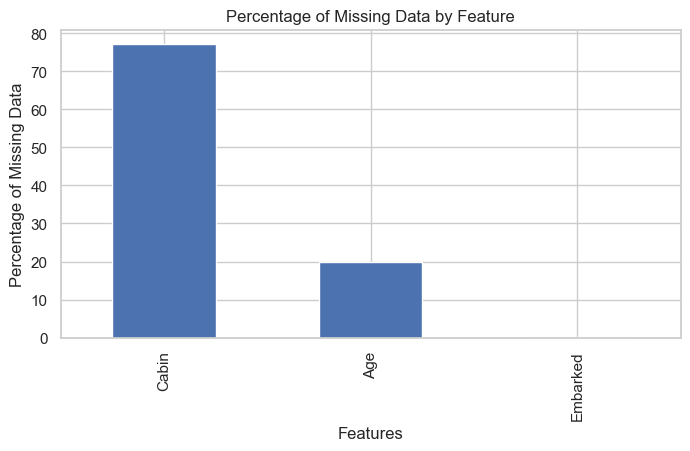

In [2]:
# load_dataset, fill_missing_values, preprocess_data

# Load dataset
train_df = load_dataset('train.csv')
test_df = load_dataset('test.csv')

# Detailed Analysis of Categorical Features: 'Sex', 'Pclass', and 'Embarked'
demonstrate_preprocessing(train_df)

# Fill missing values and drop unnecessary columns
train_df = fill_missing_values(train_df)

# Apply preprocessing steps to engineer and encode features
train_df = preprocess_data(train_df)

# Feature Engineering

<div style="text-align: justify;">In the feature engineering phase, new attributes like 'FamilySize' are created, titles are extracted from names, unnecessary features are removed, and interaction terms are added to enrich the dataset. The data is then scaled and divided into training and validation sets, preparing it for the modeling stage. This step is vital for enhancing the dataset's complexity and potential predictive power.</div>

In [5]:
# Create 'FamilySize' feature
train_df = create_family_size_feature(train_df)

# Extract and process titles from 'Name'
train_df = extract_and_process_titles(train_df)

# Drop unnecessary features
train_df = drop_unnecessary_features(train_df)

# Add interaction terms
train_df = add_interaction_terms(train_df)

# Prepare the dataset for model training
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Sex']
X = train_df[features]
y = train_df['Survived']

# Define features after feature engineering steps are applied
features = train_df.columns.drop('Survived')

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df['Survived'], test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(train_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  22.0      1      0   7.2500         0   
1            2         1       1    1  38.0      1      0  71.2833         1   
2            3         1       3    1  26.0      0      0   7.9250         0   
3            4         1       1    1  35.0      1      0  53.1000         0   
4            5         0       3    0  35.0      0      0   8.0500         0   

   FamilySize  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  \
0           2         False       False      True      False       False   
1           2         False       False     False       True       False   
2           1         False        True     False      False       False   
3           2         False       False     False       True       False   
4           1         False       False      True      False       False   

   Age_Pclass  
0        66.0  
1        38.0  
2        78.0 

# Hyperparameter Tuning

<div style="text-align: justify;">The hyperparameter tuning process identifies the optimal settings for the RandomForestClassifier model, using a defined set of features that include both original and engineered variables. The tuning results in selecting the best combination of 'max_depth', 'min_samples_split', and 'n_estimators', achieving a promising accuracy score. This step is critical for optimizing model performance by systematically exploring a range of hyperparameter values.</div>

In [7]:
# Define features used for the model based on preprocessing and feature engineering steps
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Sex', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Age_Pclass']
X = train_df[features]
y = train_df['Survived']

# Hyperparameters to tune
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4]
}

# Tune hyperparameters for RandomForestClassifier
best_params, best_score = tune_hyperparameters_grid(RandomForestClassifier(random_state=42), X, y, parameters)
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8327914129684263


# Model Training and Evaluation

<div style="text-align: justify;">During the model training and evaluation, the RandomForestClassifier is optimized with previously determined best hyperparameters. After scaling the features, the model is trained and evaluated on a validation set, achieving an accuracy of approximately 83.8%. This demonstrates the model's effective predictive capability on the given dataset.</div>

In [10]:
# Continue using the 'best_params' obtained from hyperparameter tuning

best_params = {
    'n_estimators': [100],  # Example: Number of trees in the forest, already correctly wrapped in a list
    'max_depth': [10],  # Corrected: Wrapped the single value in a list
    'min_samples_split': [2],  # Assuming this was also correctly wrapped in a list
    'min_samples_leaf': [1]  # Assuming this was also correctly wrapped in a list
}


# Training and evaluation setup
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model Training
model_trainer = ModelTrainer(RandomForestClassifier(random_state=42), best_params)
best_model = model_trainer.train(X_train_scaled, y_train)

# Model Evaluation on Validation Set
accuracy = ModelEvaluator.evaluate_model(best_model, X_val_scaled, y_val)
print(f"Validation Set Accuracy: {accuracy}")


Validation Set Accuracy: 0.8379888268156425


<div style="text-align: justify;">The test dataset undergoes the same preprocessing and feature engineering steps as the training dataset to ensure consistency in data structure and features. This preparation enables the application of the trained model to the test data, leading to the generation of survival predictions which are then formatted for submission.</div>

In [11]:
test_df = fill_missing_values(test_df)
test_df = preprocess_data(test_df)
test_df = create_family_size_feature(test_df)
test_df = extract_and_process_titles(test_df)
test_df = drop_unnecessary_features(test_df)
test_df = add_interaction_terms(test_df)

X_test = test_df[features]

# Ensure test_df_processed has the same columns as those used in training the model
if set(features) <= set(X_test.columns):
    X_test = test_df[features]
else:
    raise ValueError("Test data missing some features used in training")


#X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test) #scaler.transform(X_test)

# Making predictions using the final Random Forest model
test_predictions = best_model.predict(X_test_scaled)

# Preparing the submission file format
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Displaying the first few rows of the submission file
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Generate Submission

In [12]:
# Generate submission file
submission_file_path = 'submission.csv'
generate_submission(submission, submission_file_path)


Submission file saved to submission.csv
